We explore in this notebook the distance to the centroid of the defined cells by each technology. We also explore the differences by gene

In [1]:
import numpy as np
import pandas as pd
import tifffile as tf
from skimage.measure import label, regionprops
import os
from tqdm import tqdm
from scipy.spatial.distance import cdist
from skimage.segmentation import expand_labels, watershed
import matplotlib.pyplot as plt
import scanpy as sc
from random import sample

In [2]:
path='../../figures/2.comparison_between_datasets/input_for_segmentation/'

In [3]:
fls=os.listdir(path)

In [5]:
agg=[]
for f in fls[1:]:
#    try:
        print(f)
        transcripts=pd.read_csv(path+f+'/transcripts_with_cell_assignment.csv')
        transcripts['method']=f
        transcripts=transcripts[transcripts['closest_cell']!=0]
        selected=sample(list(transcripts.index),int(transcripts.shape[0]*0.1))
        transcripts=transcripts.loc[selected,:]
        if transcripts.shape[0]>0:
            agg.append(transcripts)
            
#    except:
#        print(f+' not possible')

CosMx
HybrISS


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


MERFISH_ABI
ResolvedBiosciences
Vizgen
Xenium


In [6]:
np.mean(agg[2]['distance_to_centroid'])

122.11803890592817

In [7]:
resulting_df=pd.concat(agg,axis=0)
rd=resulting_df
#selected=sample(list(resulting_df.index),int(resulting_df.shape[0]*0.001))
#rd=resulting_df.loc[selected,:]
rd.reset_index(inplace=True)

In [8]:
#tranform pixel to um for different methods

In [9]:
rd2=rd.copy()

In [10]:
rd2['method'].unique()

array(['CosMx', 'HybrISS', 'MERFISH_ABI', 'ResolvedBiosciences', 'Vizgen',
       'Xenium'], dtype=object)

In [ ]:
0.138

In [11]:
##these are the pixel-to-um conversions of all technologies
rd2.loc[rd2['method']=='CosMx','distance_to_centroid']=rd2.loc[rd2['method']=='CosMx','distance_to_centroid']/8.3333
rd2.loc[rd2['method']=='Xenium','distance_to_centroid']=rd2.loc[rd2['method']=='Xenium','distance_to_centroid']/4.70588
rd2.loc[rd2['method']=='Vizgen','distance_to_centroid']=rd2.loc[rd2['method']=='Vizgen','distance_to_centroid']/9.20586
rd2.loc[rd2['method']=='MERFISH_ABI','distance_to_centroid']=rd2.loc[rd2['method']=='MERFISH_ABI','distance_to_centroid']/9.28
rd2.loc[rd2['method']=='HybrISS','distance_to_centroid']=rd2.loc[rd2['method']=='HybrISS','distance_to_centroid']/3.11
## Resolvebio has a camera pixel size of  0.138um (provided internally)
rd2.loc[rd2['method']=='ResolvedBiosciences','distance_to_centroid']=rd2.loc[rd2['method']=='ResolvedBiosciences','distance_to_centroid']/7.24



In [12]:
rd2.loc[rd['method']=='CosMx','gene']=rd2.loc[rd['method']=='CosMx','target']

In [14]:
color_dicitonary = {'anno_scRNAseq': 'black',
 'anno_starmap': 'red', 'anno_allen_smfish': 'purple', 'anno_MERFISH': 'orangered', 'anno_Hybriss': 'limegreen',
 'anno_osmfish': 'yellow', 'anno_exseq': 'brown', 'anno_Vizgen': '#E220F5', 'anno_baristaseq': 'orange',
 'anno_Xenium': 'steelblue','anno_ResolveBio':'forestgreen',  'anno_CosMx':'cyan'}

In [15]:
dicti={'CosMx':'#FFA630', 'HybrISS':'#e82a92', 'ResolvedBiosciences':'#4DA1A9', 'Vizgen':'#2E5077', 'Xenium':'#56018f',
      'MERFISH_ABI':'#9EE493'}

In [17]:
rd4=rd2.copy()

In [18]:
rd4['distance_to_centroid']=-rd4['distance_to_centroid']

In [19]:
rd5=pd.concat([rd2,rd4])

In [20]:
#=rd5.reset_index(inplace=True)
selected=sample(list(rd5.index),int(rd5.shape[0]*0.01))
rd5=rd5.loc[selected,:]

(-40.0, 40.0)

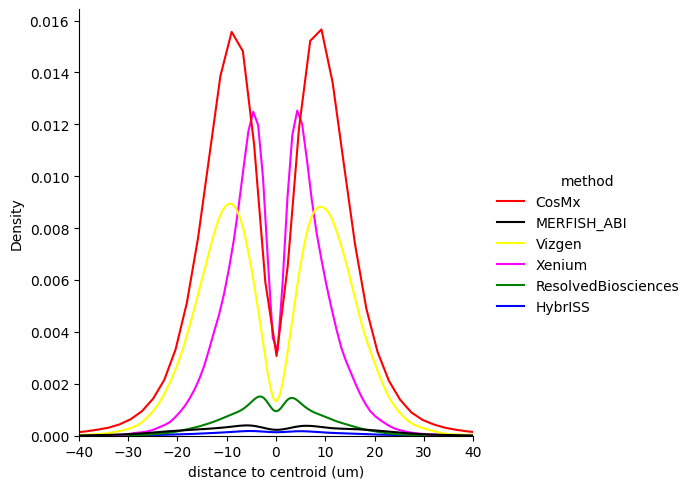

In [84]:
import seaborn as sns
sns.displot(data=rd5,x='distance_to_centroid',hue='method',kind='kde',palette=dicti)
plt.xlabel('distance to centroid (um)')
plt.xlim([-40,40])

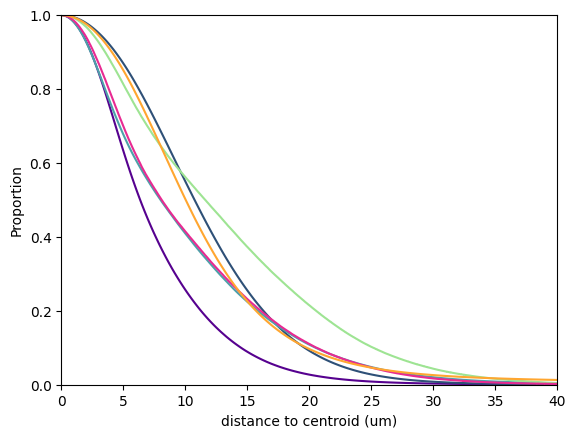

In [24]:
import seaborn as sns
#sns.displot(data=rd2,x='distance_to_centroid',hue='method',kind='ecdf',palette=dicti)
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sns.ecdfplot(data=rd2,x='distance_to_centroid',hue='method',complementary=True,palette=dicti,legend=False)
plt.xlabel('distance to centroid (um)')
plt.xlim([0,40])
plt.savefig('../../figures/2.comparison_between_datasets/accumulative_density_allmethods_allgenes.pdf')

In [25]:
meth=pd.crosstab(rd2['gene'],rd2['method'])
genes=pd.DataFrame(np.sum(meth>1,axis=1)).sort_values(by=0,ascending=False)

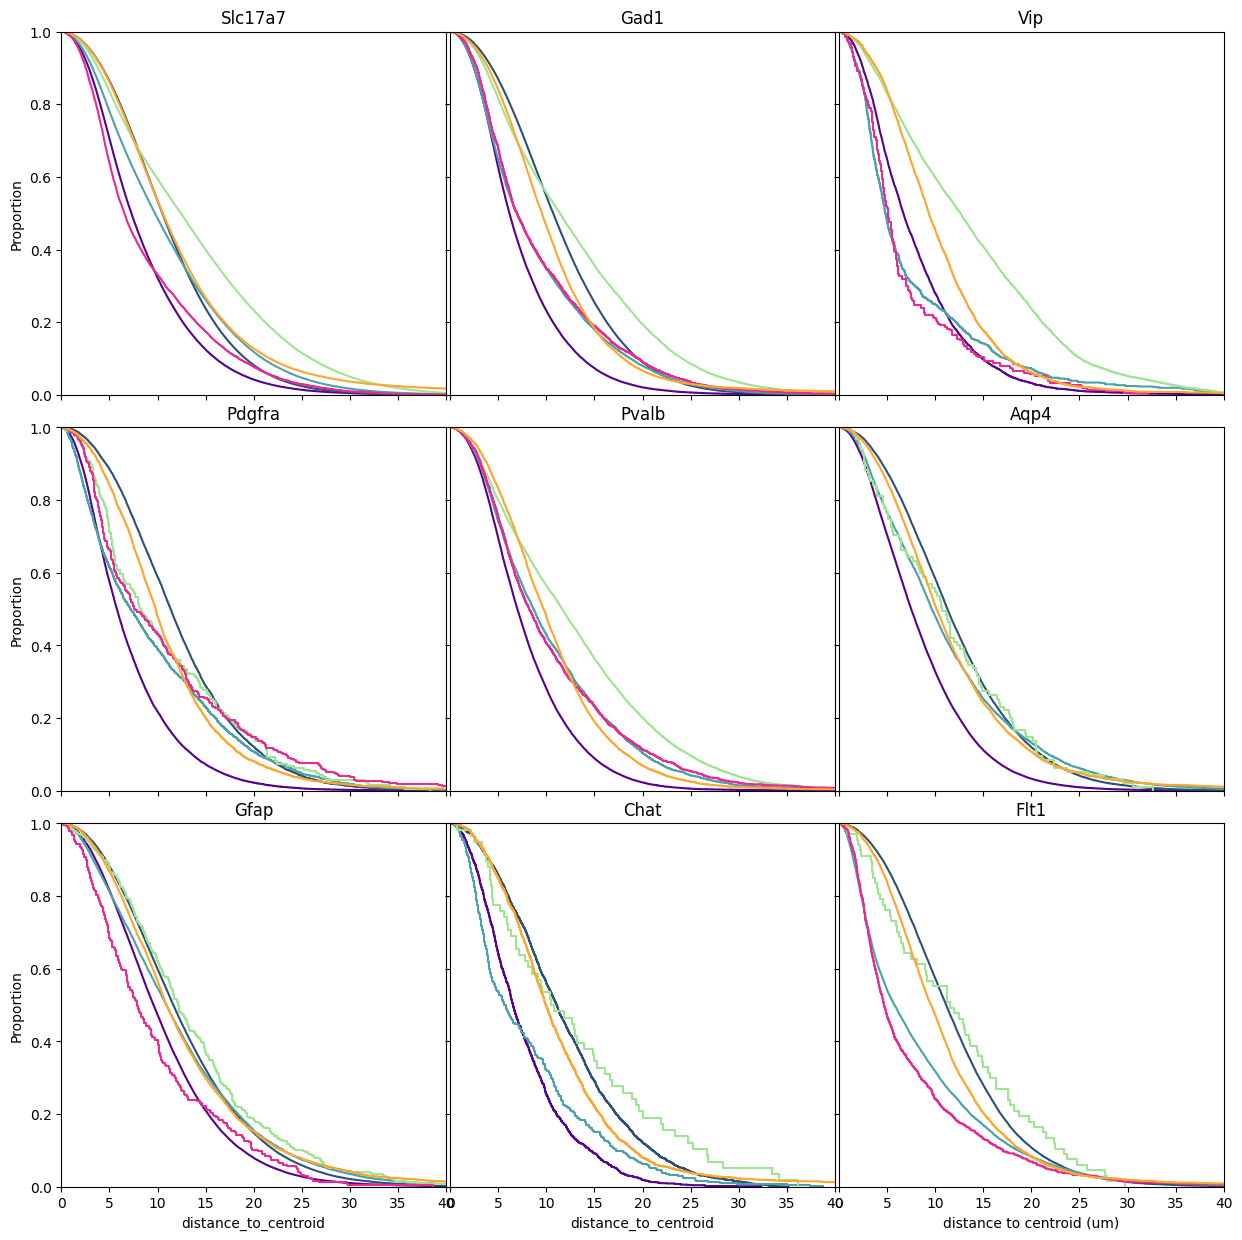

In [26]:
fig = plt.figure(figsize=(15,15))
gs = fig.add_gridspec(3,3,hspace=0.09, wspace=0.01)
axs = gs.subplots(sharex=True, sharey=True)
results=pd.DataFrame(index=genes.index[0:25],columns=rd2['method'].unique())
n=0
ini=0
for g in genes.index[0:9]:
    rd3=rd2.loc[rd2['gene']==g,:]
    sns.ecdfplot(data=rd3,x='distance_to_centroid',hue='method',complementary=True,palette=dicti,legend=False,ax=axs[n][ini]).set(title=g)
    plt.xlabel('distance to centroid (um)')
    plt.xlim([0,40])
    plt.title(g)
    averages=rd3.groupby('method').mean()
    for indi in averages.index:
        results.loc[g,indi]=averages.loc[indi,'distance_to_centroid']
    n=n+1
    if n==3:
        ini=ini+1
        n=0
plt.savefig('../../figures/2.comparison_between_datasets/accumulative_density_allmethods_subsetgenes.pdf')

/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


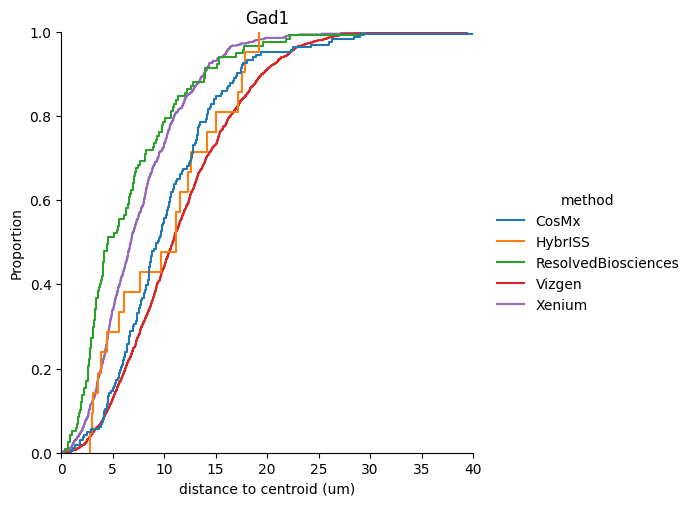

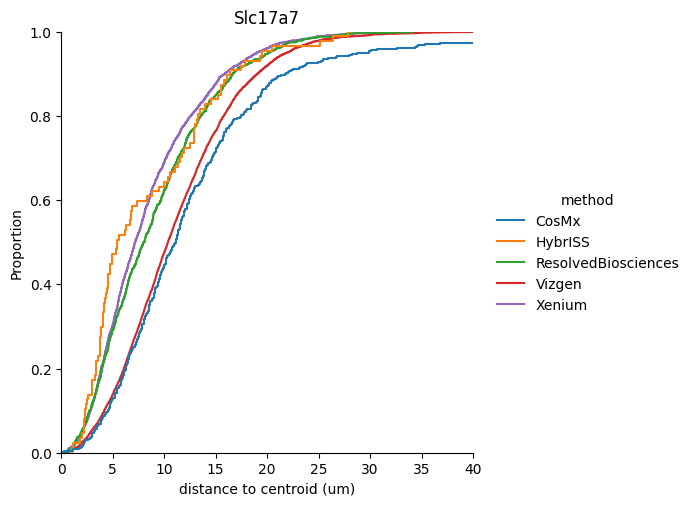

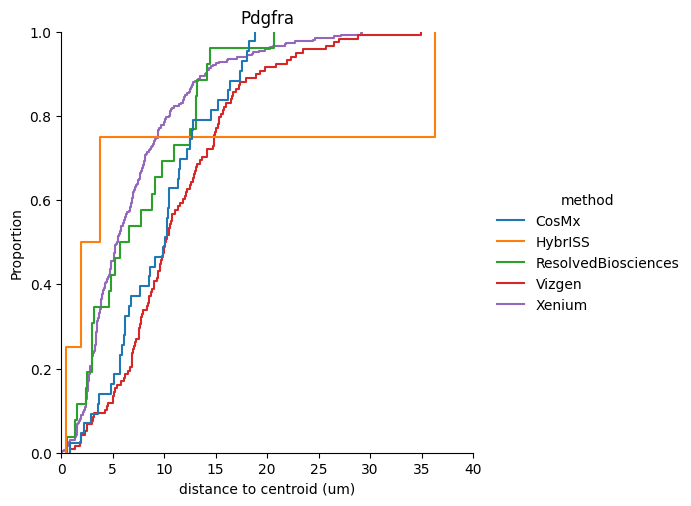

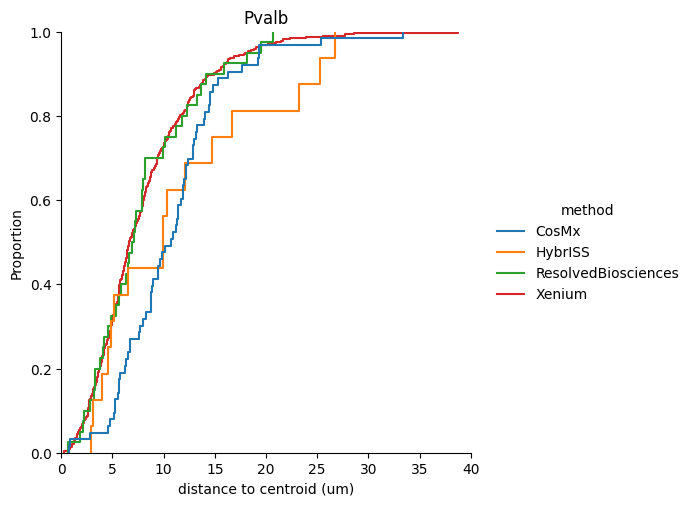

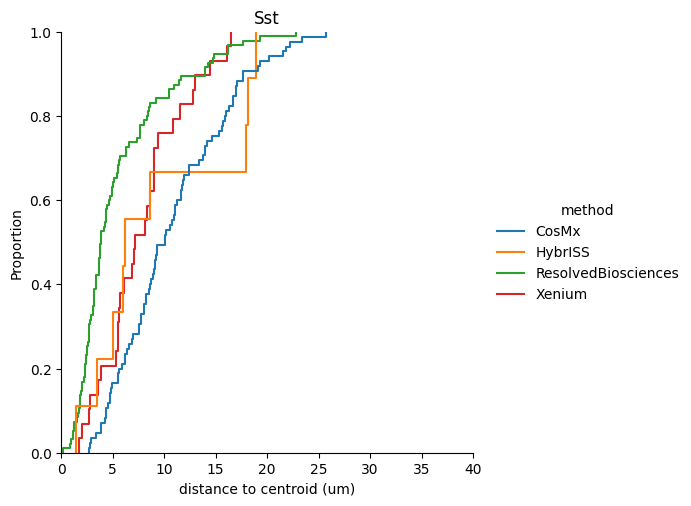

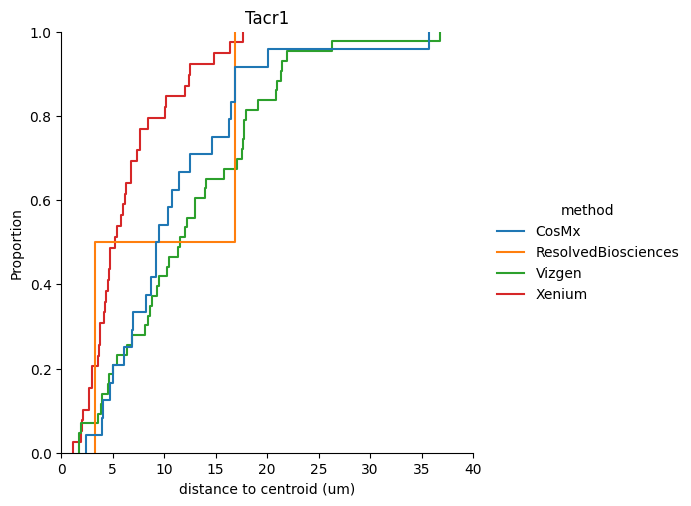

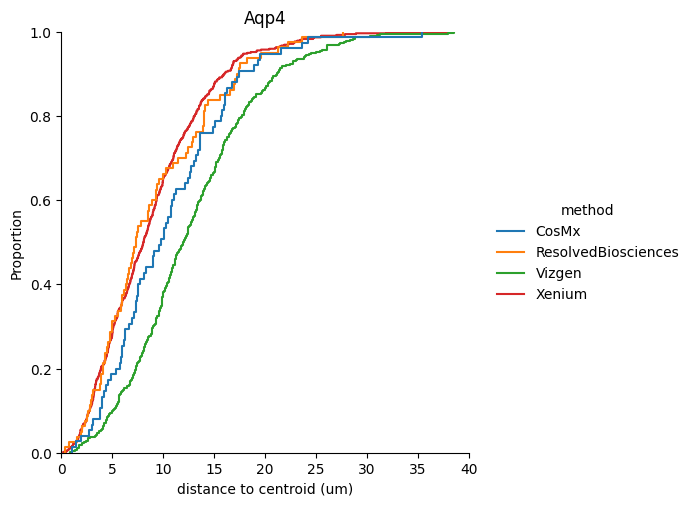

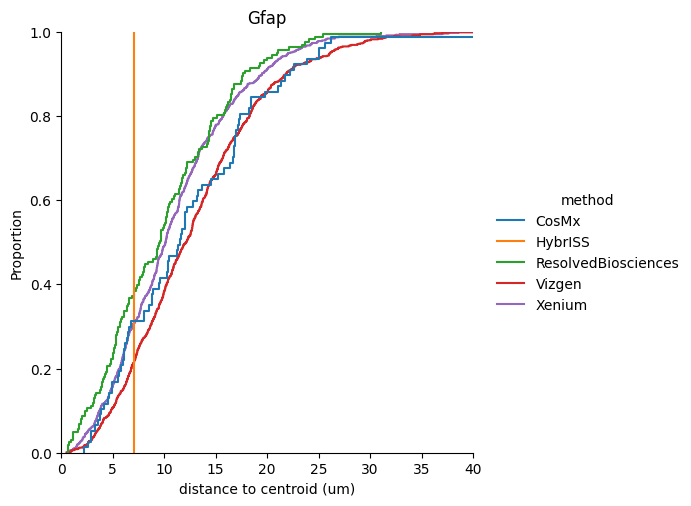

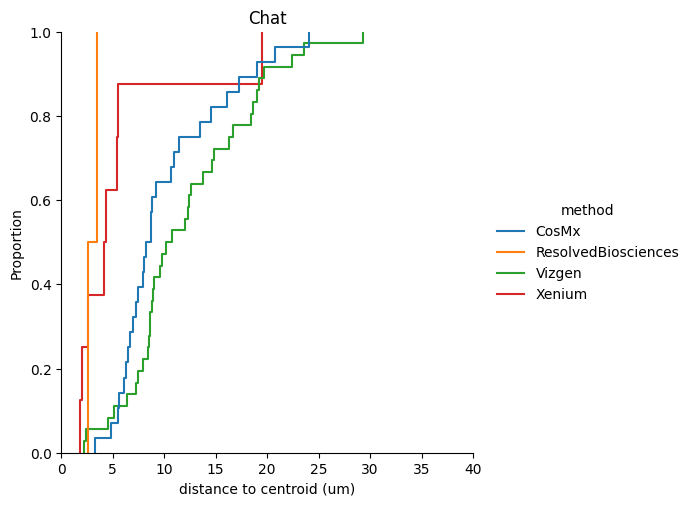

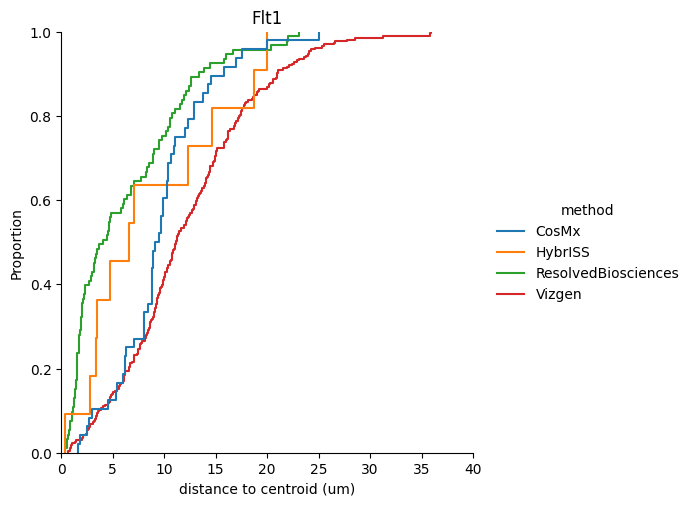

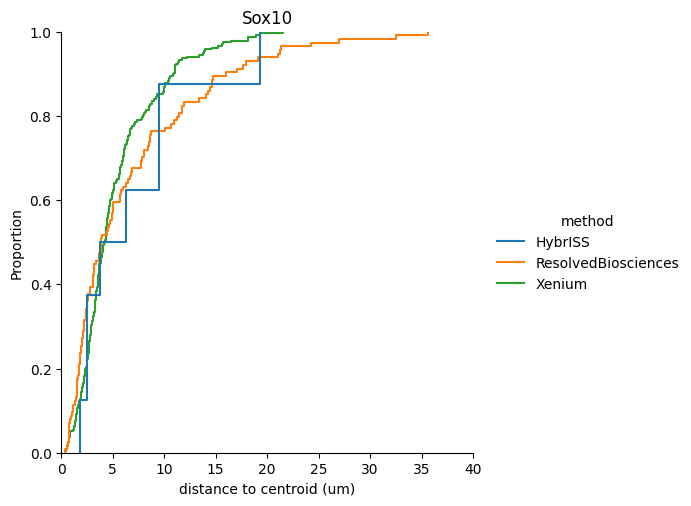

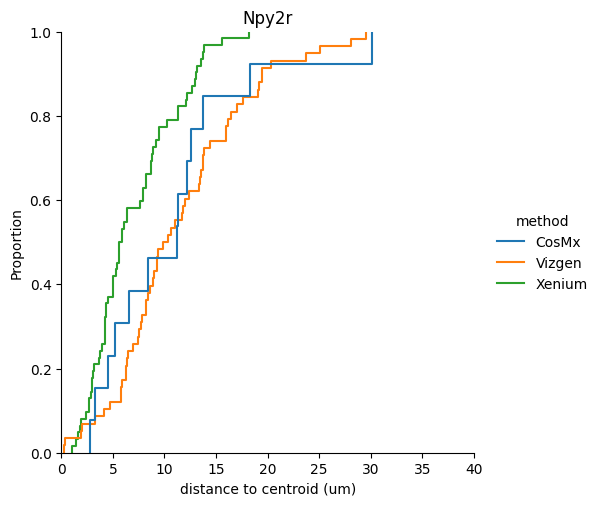

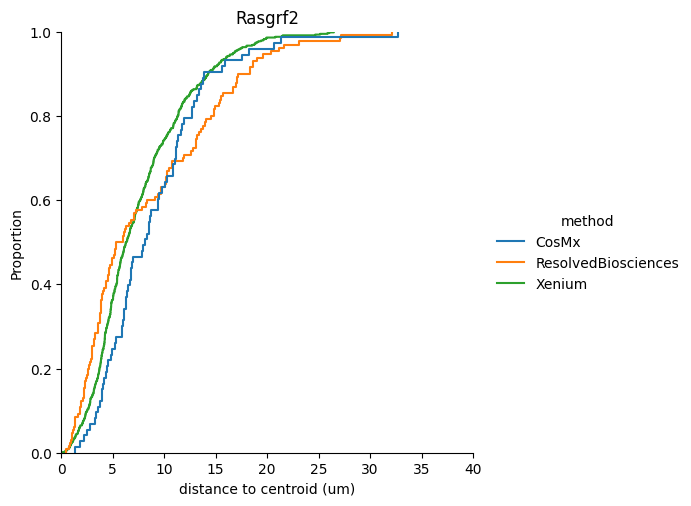

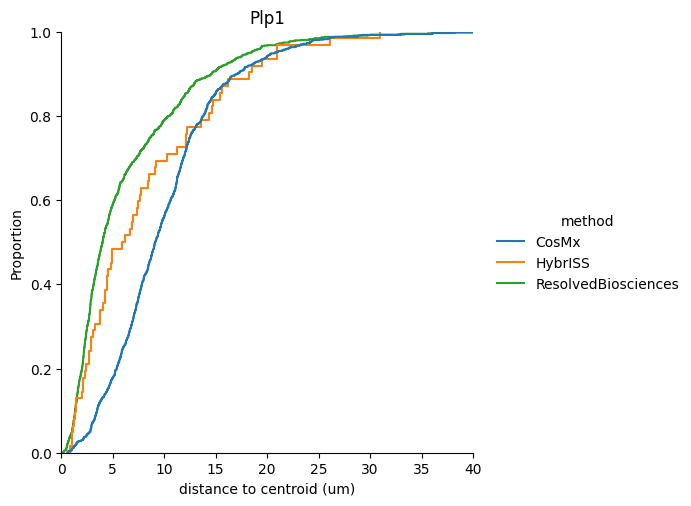

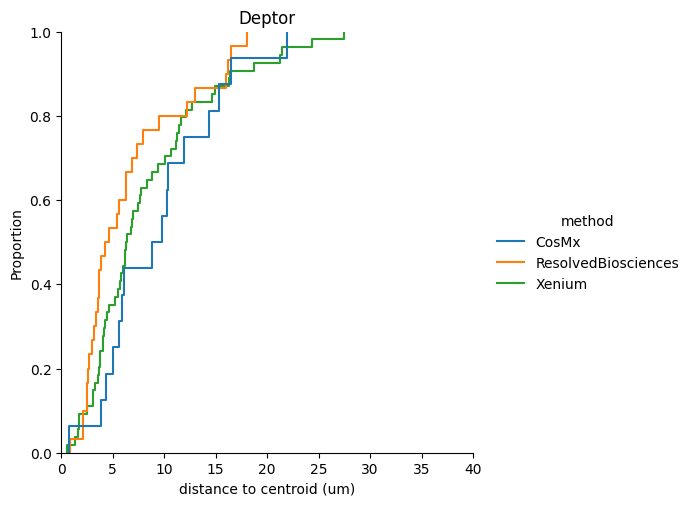

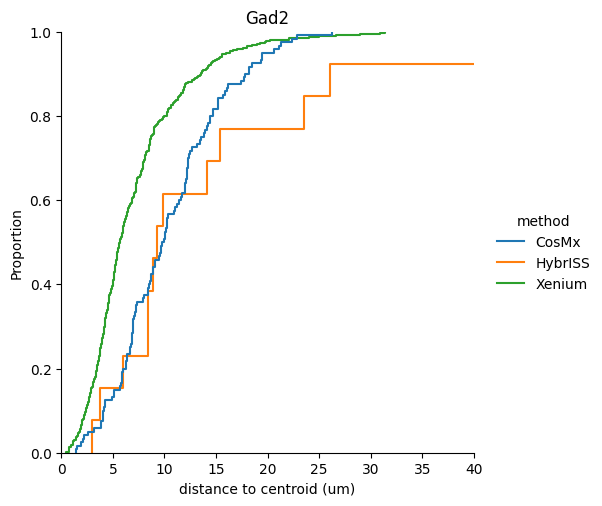

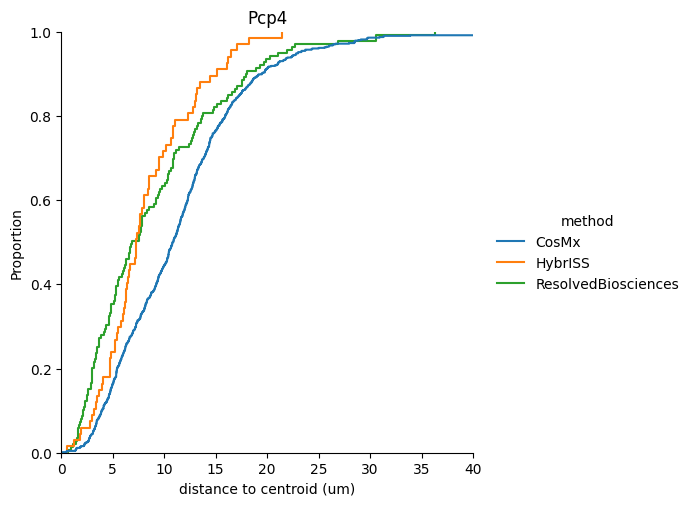

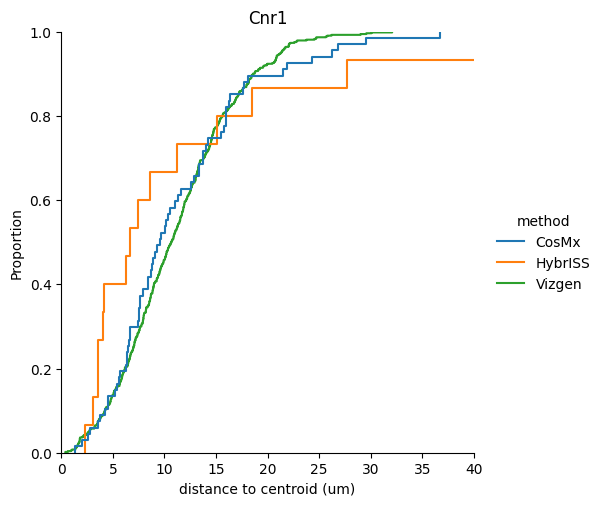

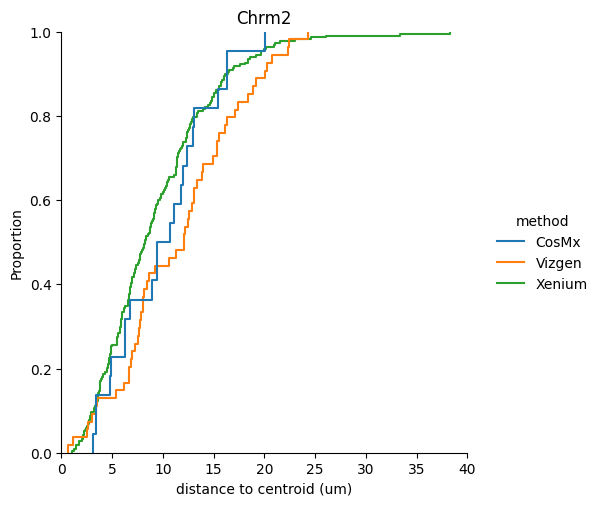

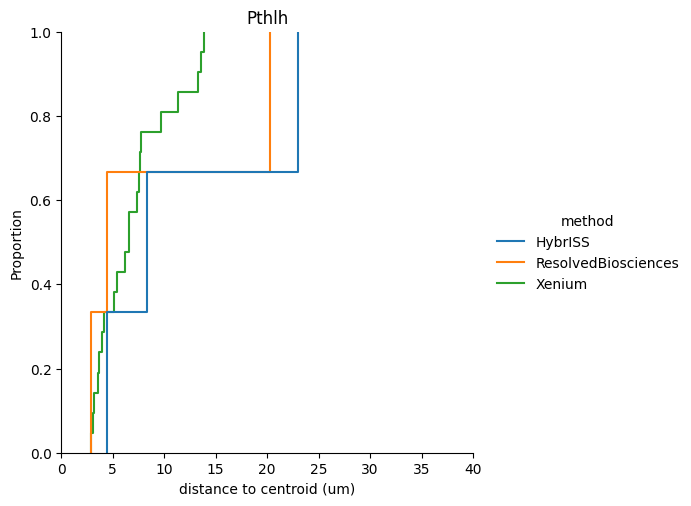

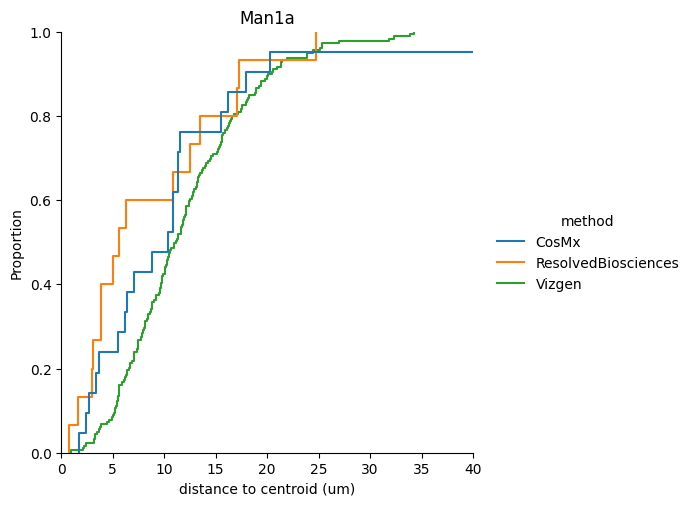

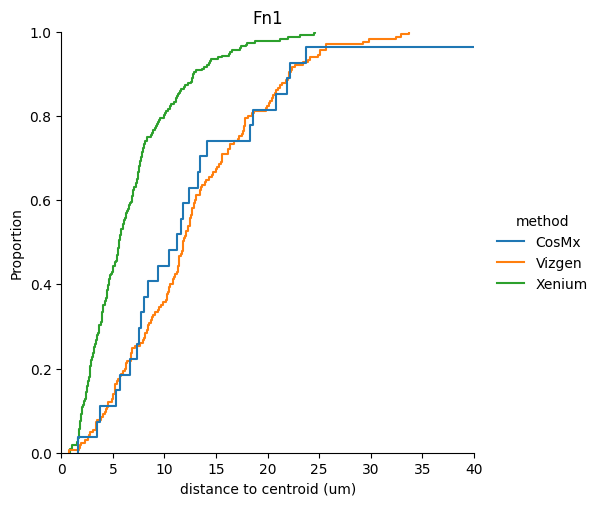

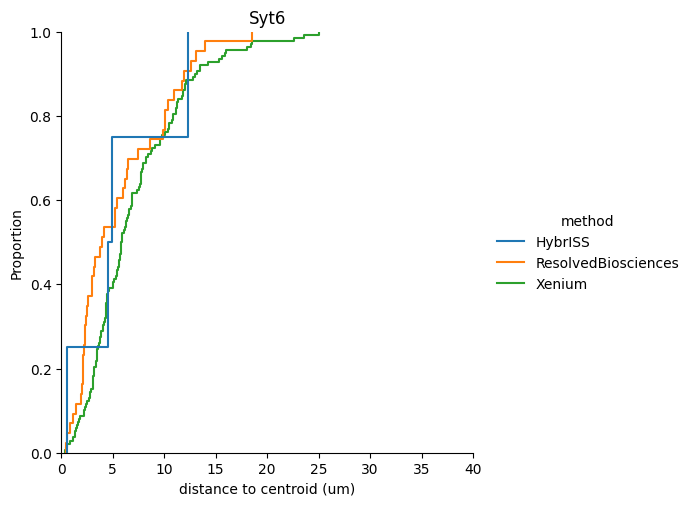

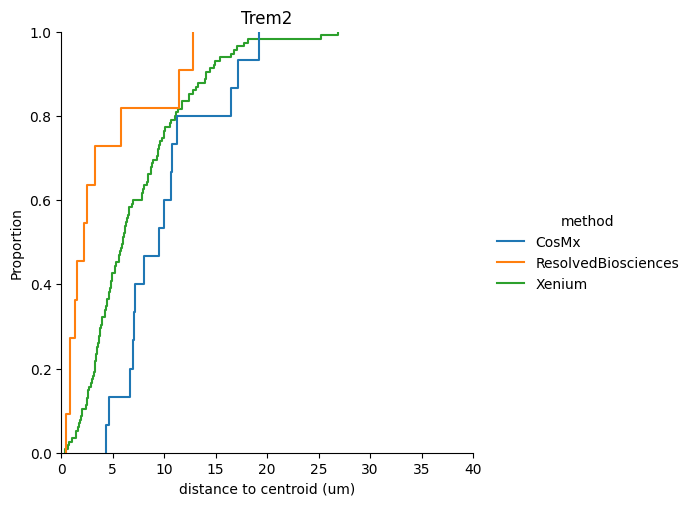

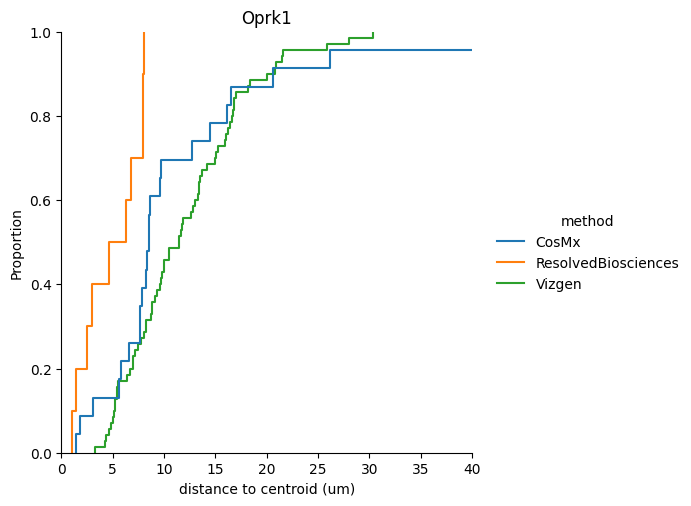

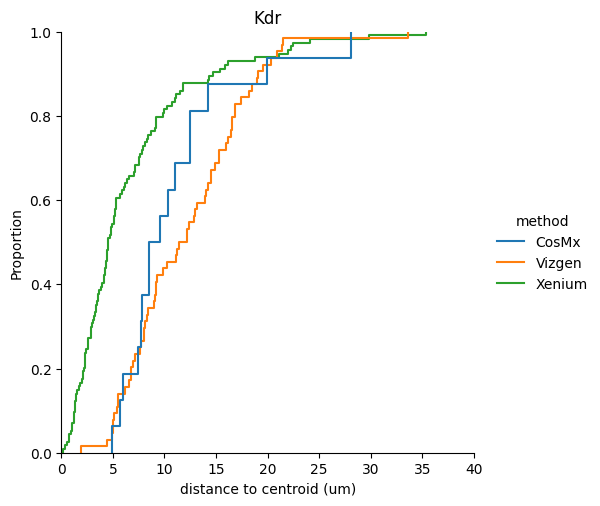

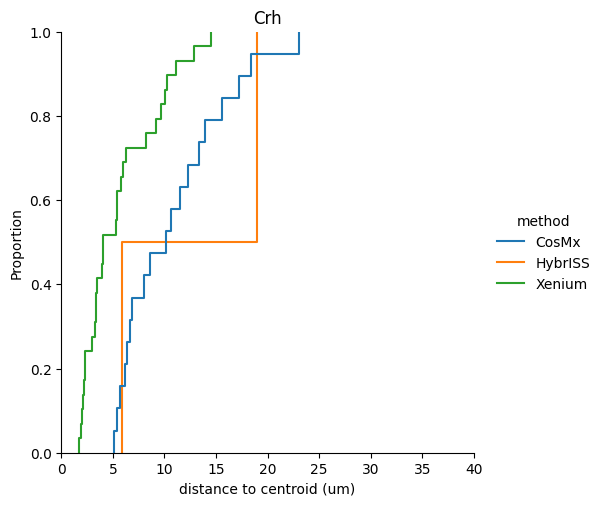

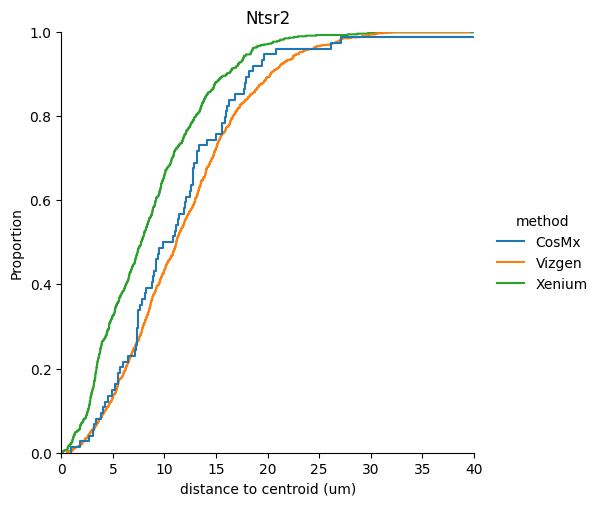

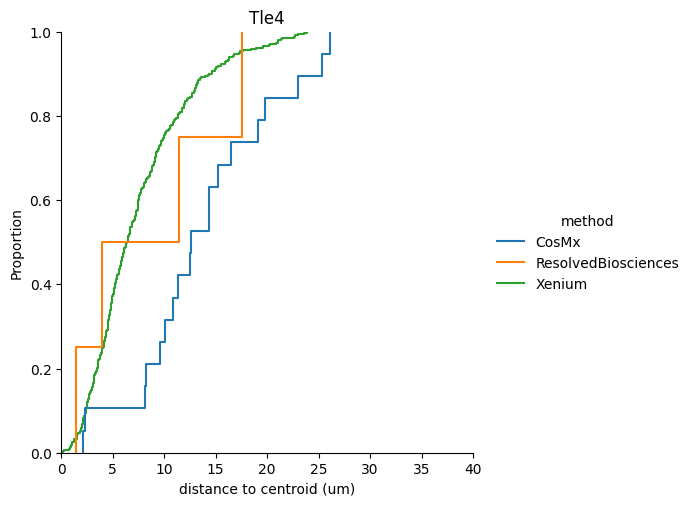

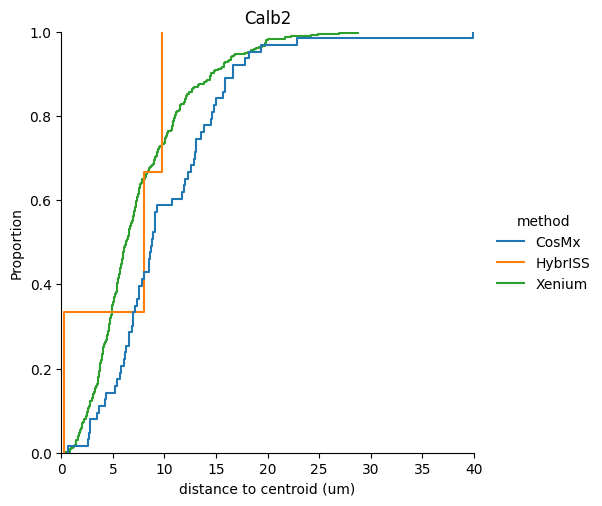

In [86]:
results=pd.DataFrame(index=genes.index[0:30],columns=rd2['method'].unique())
for g in genes.index[0:30]:
    rd3=rd2.loc[rd2['gene']==g,:]
    sns.displot(data=rd3,x='distance_to_centroid',hue='method',kind='ecdf',palette=dicti)
    plt.xlabel('distance to centroid (um)')
    plt.xlim([0,40])
    plt.title(g)
    averages=rd3.groupby('method').mean()
    for indi in averages.index:
        results.loc[g,indi]=averages.loc[indi,'distance_to_centroid']

In [93]:
gorder=pd.DataFrame(np.mean(results,axis=1)).sort_values(by=0)
morder=pd.DataFrame(np.mean(results,axis=0)).sort_values(by=0)

In [94]:
morder

,0
ResolvedBiosciences,7.277394
Xenium,7.476179
HybrISS,9.318102
CosMx,11.226329
Vizgen,11.960982


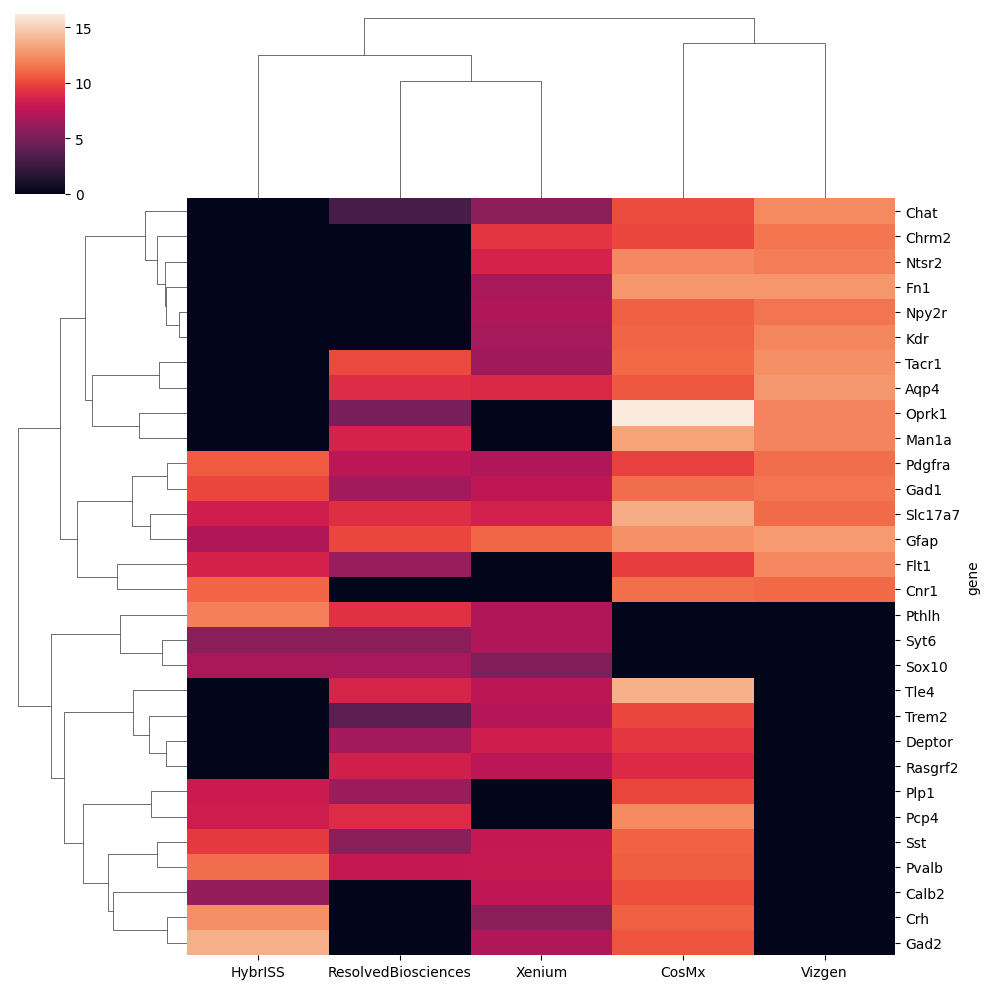

In [97]:
sns.clustermap(results.fillna(0).loc[gorder.index,morder.index])

In [72]:
for g in genes.index[0:10]:
    rd3=rd2.loc[rd2['gene']==g,:]
    sns.displot(data=rd3,x='distance_to_centroid',hue='method',kind='ecdf')
    plt.xlabel('distance to centroid (um)')
    plt.xlim([0,40])
    plt.title(g)
    

,index,Unnamed: 0,Unnamed: 0.1,y,x,gene,in_cell,closest_cell,closest_cell_x,closest_cell_y,distance_to_centroid,method,transcript_id
0,46015524,46015524,NaN,20913.270955,34838.521404,Slc17a7,0,75888,20881.430365,34894.179224,64.121884,Xenium,2.818658e+14
1,23463454,23463454,NaN,15094.633864,23559.489397,Slc17a7,0,48954,15066.670625,23551.132225,29.185357,Xenium,2.817026e+14
2,39467783,39467783,NaN,19573.336096,5629.584009,Fezf2,70107,70107,19568.247994,5611.674157,18.618581,Xenium,2.818186e+14
3,24028535,24028535,NaN,15574.492448,25904.534342,Slc17a6,51146,51146,15574.136765,25886.052247,18.485517,Xenium,2.817069e+14
4,60902855,60902855,NaN,26876.402091,17681.928100,Nrn1,102197,102197,26869.344811,17684.108214,7.386346,Xenium,2.819818e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91693,3498565,3498565,NaN,30145.199045,22083.951311,Cabp7,0,114776,30123.761815,22011.057971,75.980220,Xenium,2.815222e+14
91694,29088592,29088592,NaN,15225.178270,45271.182070,Wfs1,49728,49728,15234.470534,45253.836096,19.678135,Xenium,2.817327e+14
91695,794787,794787,794787.0,8714.000000,6918.000000,Aldoc,0,20285,8721.626761,6947.723005,30.685900,HybrISS,NaN
91696,794787,794787,NaN,4968.000000,23888.000000,Slc17a7,0,17865,23788.447870,4914.585036,112.976922,ResolvedBiosciences,NaN


In [121]:
resu=pd.crosstab(rd2['method'],rd2['in_cell']>0)

In [129]:
resumean=resu.div(resu.sum(axis=1),axis=0)
resumean=resumean.sort_values(by=True)

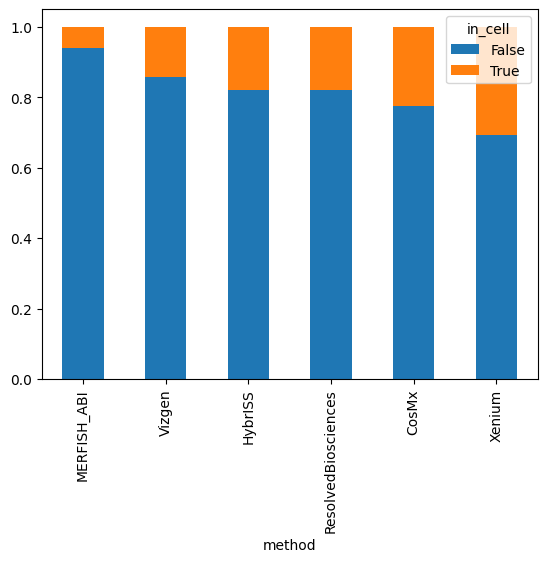

In [131]:
resumean.plot(kind='bar',stacked=True)
plt.savefig('../../figures/2.comparison_between_datasets/stacked_barplot_assigned_reads.pdf')